# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# svm algorithm with mnist dataset

In [2]:
# Import necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# Separate data and labels
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Split the dataset into training and test sets
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Scale the data (SVMs work better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Initialize and train the SVM Classifier (with a linear kernel for faster training)
svm_clf = SVC(kernel="rbf", gamma=0.001, C=5)  # You can experiment with other kernels like 'linear'

# Train the model
svm_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test_scaled)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy:.4f}")


SVM Classifier Accuracy: 0.9730


In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# Separate data and labels
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Split the dataset into training and test sets
X_train = X[:10000]
y_train = y[:10000]
X_test = X[10000:]
y_test = y[10000:]

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 5, 10],        # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient for RBF kernel
    'kernel': ['linear', 'rbf']   # Try both linear and RBF kernels
}

# Initialize the SVM model
svm_clf = SVC()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Train the best model on the full training set
best_svm_clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best SVM Classifier Accuracy: {accuracy:.4f}")


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found:  {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}
Best SVM Classifier Accuracy: 0.9456


In [12]:
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

# Separate data and labels
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

# Split the dataset into training and test sets
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Scale the data (SVMs work better with scaled data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# Parameter grid for Polynomial Kernel (degree, C, coef0)
param_grid_poly = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'degree': [2, 3, 4],           # Degree of the polynomial
    'coef0': [0, 0.5, 1],          # Independent term in kernel function
    'kernel': ['poly']             # Polynomial kernel
}

# Parameter grid for RBF Kernel (C, gamma)
param_grid_rbf = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf']              # RBF kernel
}

# Parameter grid for Linear Kernel (C)
param_grid_linear = {
    'C': [0.1, 1, 10],             # Regularization parameter
    'kernel': ['linear']           # Linear kernel
}

# Initialize the SVM model (we'll use this in GridSearchCV for all kernels)
svm_clf = SVC()

# Perform Grid Search for Polynomial Kernel
grid_search_poly = GridSearchCV(svm_clf, param_grid_poly, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_poly.fit(X_train_scaled, y_train)
best_poly_clf = grid_search_poly.best_estimator_

# Perform Grid Search for RBF Kernel
grid_search_rbf = GridSearchCV(svm_clf, param_grid_rbf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rbf.fit(X_train_scaled, y_train)
best_rbf_clf = grid_search_rbf.best_estimator_

# Perform Grid Search for Linear Kernel
grid_search_linear = GridSearchCV(svm_clf, param_grid_linear, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_linear.fit(X_train_scaled, y_train)
best_linear_clf = grid_search_linear.best_estimator_

# Compare the models on the test set
models = {
    'Polynomial SVM': best_poly_clf,
    'RBF SVM': best_rbf_clf,
    'Linear SVM': best_linear_clf
}

for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print the results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1-Score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print best hyperparameters for each model
print("Best parameters for Polynomial SVM:", grid_search_poly.best_params_)
print("Best parameters for RBF SVM:", grid_search_rbf.best_params_)
print("Best parameters for Linear SVM:", grid_search_linear.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Evaluating Polynomial SVM...
Polynomial SVM Accuracy: 0.9802
Polynomial SVM Precision: 0.9802
Polynomial SVM Recall: 0.9802
Polynomial SVM F1-Score: 0.9802

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.9

### polynomial

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svc = SVC()

param_grid_poly = {
    'kernel': ['poly'],
    'degree': [2, 3, 4],         
    'C': [0.1, 1, 10],           
    'coef0': [0, 1, 10]          
}

grid_search_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, scoring='accuracy', verbose=2, n_jobs=8)
grid_search_poly.fit(X_train, y_train)

print(f"Best Polynomial Kernel Parameters: {grid_search_poly.best_params_}")
y_pred_poly = grid_search_poly.best_estimator_.predict(X_test)
print("Polynomial Kernel - Test Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Polynomial Kernel - Classification Report:\n", classification_report(y_test, y_pred_poly))

### RBF

In [6]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')

# Split data into features and labels
X, y = mnist.data, mnist.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM with the best-found parameters
rbf_svm = SVC(C=10, gamma=0.001, kernel='rbf')

# Train the SVM model
rbf_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = rbf_svm.predict(X_test)

# Evaluate the model
print("RBF Kernel - Test Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Kernel - Classification Report:\n", classification_report(y_test, y_pred_rbf))


RBF Kernel - Test Accuracy: 0.9712142857142857
RBF Kernel - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.96      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.94      0.98      0.96      1503
           8       0.98      0.95      0.96      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



### Linear

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVC model
svc_linear = SVC()

# Define the parameter grid for the Linear kernel
param_grid_linear = {
    'kernel': ['linear'],  # Linear kernel
    'C': [0.1, 1, 10, 100]  # Regularization parameter
}

# Set up GridSearchCV for hyperparameter tuning
grid_search_linear = GridSearchCV(SVC(), param_grid_linear, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Train the Linear SVM with grid search
grid_search_linear.fit(X_train, y_train)

# Output the best parameters
print(f"Best Linear Kernel Parameters: {grid_search_linear.best_params_}")

# Make predictions using the best model from grid search
y_pred_linear = grid_search_linear.best_estimator_.predict(X_test)

# Evaluate the Linear kernel model
print("Linear Kernel - Test Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Linear Kernel - Classification Report:\n", classification_report(y_test, y_pred_linear))


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Linear Kernel Parameters: {'C': 0.1, 'kernel': 'linear'}
Linear Kernel - Test Accuracy: 0.9434285714285714
Linear Kernel - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.96      0.98      0.97      1600
           2       0.93      0.93      0.93      1380
           3       0.92      0.93      0.92      1433
           4       0.94      0.95      0.94      1295
           5       0.91      0.91      0.91      1273
           6       0.97      0.96      0.97      1396
           7       0.95      0.96      0.95      1503
           8       0.94      0.90      0.92      1357
           9       0.94      0.92      0.93      1420

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



### KNN

In [4]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time  


mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Measuring training time
start_time = time.time()  
knn.fit(X_train_pca, y_train)  
end_time = time.time()  


training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")  


y_pred = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))

Training Time: 0.0983 seconds
Test Accuracy: 97.52%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.97      0.99      0.98      1600
           2       0.98      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.95      0.97      1357
           9       0.96      0.97      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.97      0.98     14000
weighted avg       0.98      0.98      0.98     14000



### Random

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Measuring training time
start_time = time.time()  
rf.fit(X_train_pca, y_train)  
end_time = time.time()  

# Calculate training time
training_time = end_time - start_time
print(f"Random Forest Training Time: {training_time:.4f} seconds")  

# Predict on the test set
y_pred_rf = rf.predict(X_test_pca)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf * 100:.2f}%")

# Print classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Training Time: 108.9319 seconds
Random Forest Test Accuracy: 94.69%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.98      0.98      0.98      1600
           2       0.94      0.95      0.95      1380
           3       0.91      0.94      0.92      1433
           4       0.93      0.95      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.96      0.97      0.97      1396
           7       0.95      0.95      0.95      1503
           8       0.94      0.89      0.92      1357
           9       0.94      0.92      0.93      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



### SGD

In [6]:
from sklearn.linear_model import SGDClassifier

# Initialize the SGD Classifier
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Measuring training time
start_time = time.time()  
sgd.fit(X_train_pca, y_train)  
end_time = time.time()  

# Calculate training time
training_time = end_time - start_time
print(f"SGD Classifier Training Time: {training_time:.4f} seconds")  

# Predict on the test set
y_pred_sgd = sgd.predict(X_test_pca)

# Calculate accuracy
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print(f"SGD Classifier Test Accuracy: {accuracy_sgd * 100:.2f}%")

# Print classification report
print("SGD Classifier Classification Report:\n", classification_report(y_test, y_pred_sgd))


SGD Classifier Training Time: 6.6904 seconds
SGD Classifier Test Accuracy: 90.84%
SGD Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1343
           1       0.97      0.96      0.96      1600
           2       0.88      0.91      0.89      1380
           3       0.88      0.88      0.88      1433
           4       0.91      0.92      0.92      1295
           5       0.84      0.87      0.86      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.93      0.93      1503
           8       0.87      0.83      0.85      1357
           9       0.89      0.87      0.88      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



## Results

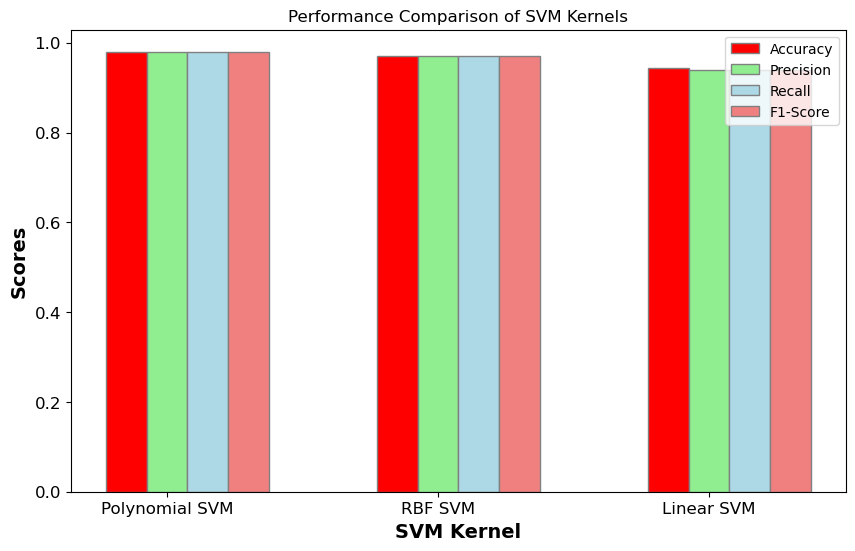

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics for each kernel
kernels = ['Polynomial SVM', 'RBF SVM', 'Linear SVM']
accuracy = [0.9802, 0.9712, 0.9434]
precision = [0.9802, 0.97, 0.94]
recall = [0.9802, 0.97, 0.94]
f1_score = [0.9802, 0.97, 0.94]

# Set the bar width
bar_width = 0.15

# Set positions of bars on X axis
r1 = np.arange(len(kernels))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the bars
plt.bar(r1, accuracy, color='red', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='lightgreen', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='lightblue', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='lightcoral', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels, title, and grid
plt.xlabel('SVM Kernel', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(kernels))], kernels)
plt.title('Performance Comparison of SVM Kernels')
plt.legend()

# Show the plot
plt.show()


### 2

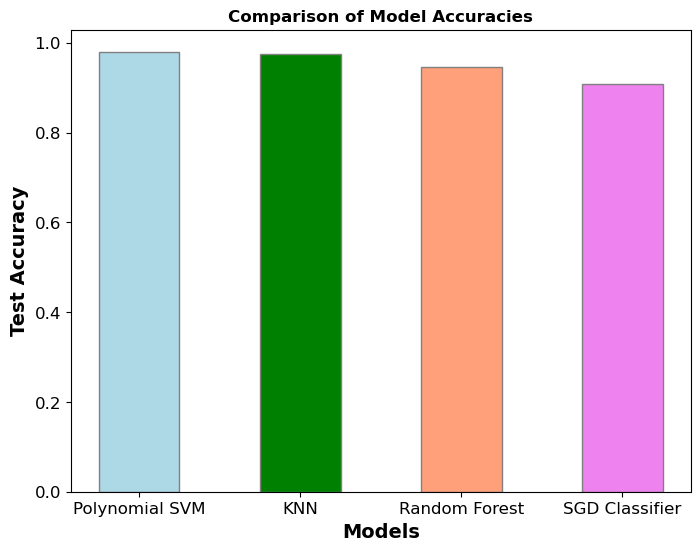

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data: Model names and their corresponding accuracy
models = ['Polynomial SVM', 'KNN', 'Random Forest', 'SGD Classifier']
accuracies = [0.9802, 0.9752, 0.9469, 0.9084]  # Accuracy values

# Set the positions and width for the bars
positions = np.arange(len(models))
bar_width = 0.5

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(positions, accuracies, color=['lightblue', 'green', 'lightsalmon', 'violet'], width=bar_width, edgecolor='grey')

# Add labels and title
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Test Accuracy', fontweight='bold')
plt.title('Comparison of Model Accuracies', fontweight='bold')

# Add the model names as x-ticks
plt.xticks(positions, models)

# Show the plot
plt.show()
